### Wrangling

In [ ]:
#because we had to download two separate datasets (one w/ 22-23 season stats across 11 .csv files & the other
#w/ 23-24 season stats in 1 .csv file, I had to combine all CSV files into a single file ('nba.csv')

  #note: after downloading from kaggle, but before combining the files into one CSV, I used Excel to add a 
    #column in each file indicating the season (22-23 or 23-24) so we can differentiate the data

import os
import pandas as pd

#get current working directory
csv_directory= os.getcwd()

#get list of all CSV files in directory
csv_files= [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

#empty list to hold dataframes
dfs= []

#loop through list of CSV files & read each into a dataframe
for file in csv_files:
    df= pd.read_csv(file)
    dfs.append(df)

#concatenate all dataframes into one
combined_df= pd.concat(dfs, ignore_index=True)

#save combined dataframe to a new CSV file
combined_df.to_csv('nba.csv', index=False)
print('CSV files have been successfully combined into nba.csv')

In [1]:
#imports & load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nba= pd.read_csv('nba.csv')

In [2]:
#peek at data
nba[:5]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SEASON
0,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,...,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,22-23
1,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,...,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,22-23
2,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,...,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,22-23
3,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,...,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,22-23
4,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,...,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0,22-23


In [3]:
#look at what we're working with
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6201 entries, 0 to 6200
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  6201 non-null   object 
 1   Pos     6201 non-null   object 
 2   Age     6201 non-null   int64  
 3   Tm      6201 non-null   object 
 4   G       6201 non-null   int64  
 5   GS      6201 non-null   int64  
 6   MP      6201 non-null   float64
 7   FG      6201 non-null   float64
 8   FGA     6201 non-null   float64
 9   FG%     6086 non-null   float64
 10  3P      6201 non-null   float64
 11  3PA     6201 non-null   float64
 12  3P%     5544 non-null   float64
 13  2P      6201 non-null   float64
 14  2PA     6201 non-null   float64
 15  2P%     5955 non-null   float64
 16  eFG%    6086 non-null   float64
 17  FT      6201 non-null   float64
 18  FTA     6201 non-null   float64
 19  FT%     5337 non-null   float64
 20  ORB     6201 non-null   float64
 21  DRB     6201 non-null   float64
 22  

In [4]:
#noticed inconsistent numbers from above as well as when looking at duplicate rows, so
#began to do some cleaning

#remove duplicate player-team-season combinations, because of duplicate players showing up across different teams
nba_unique= nba.drop_duplicates(subset=['Player', 'Tm', 'SEASON'], keep='first')

#find players who have 'TOT' entries for each season ('TOT' is an indicator that a player showed up on 2+ teams)
players_with_tot= nba_unique[nba_unique['Tm'] == 'TOT'][['Player', 'SEASON']]

#merge the original data w/ TOT players to flag them
nba_with_flag= nba_unique.merge(players_with_tot.assign(has_tot=True), on=['Player', 'SEASON'], how='left')

#filter to keep 'TOT' rows if 'has_tot' is True, otherwise keep all rows
nba_filtered= nba_with_flag[(nba_with_flag['Tm'] == 'TOT') | (nba_with_flag['has_tot'].isnull())]

#drop column used for filtering
nba_filtered= nba_filtered.drop(columns=['has_tot'])

#verify filtering
print(f"Original dataset size: {nba_unique.shape[0]}")
print(f"Filtered dataset size: {nba_filtered.shape[0]}")

# -----
#noticed positions that were too similar (SG-PG, SF-SG, SF-PF, PF-C, PF-SF) & low in value counts

#define top 5 positions
top_pos= ['SG', 'SF', 'PF', 'C', 'PG']

#drop rows where the position is not in the top 5
nba_filtered= nba_filtered[nba_filtered['Pos'].isin(top_pos)]

#verify filtering after removing non-top positions
print(f"Dataset size after dropping non-top positions: {nba_filtered.shape[0]}")

#save dataset
nba_filtered.to_csv('nba_filtered.csv', index=False)

Original dataset size: 1254
Filtered dataset size: 1072
Dataset size after dropping non-top positions: 1056


In [5]:
#example of a player showing up in multiple teams for a single season
nba_unique[nba_unique['Player'] == 'Nickeil Alexander-Walker']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SEASON
5,Nickeil Alexander-Walker,SG,24,TOT,59,3,15.0,2.2,5.0,0.444,...,0.3,1.5,1.7,1.8,0.5,0.4,0.9,1.5,6.2,22-23
6,Nickeil Alexander-Walker,SG,24,UTA,36,3,14.7,2.3,4.7,0.488,...,0.2,1.4,1.6,2.1,0.7,0.4,1.3,1.6,6.3,22-23
7,Nickeil Alexander-Walker,SG,24,MIN,23,0,15.5,2.1,5.4,0.384,...,0.3,1.5,1.8,1.4,0.3,0.3,0.4,1.3,5.9,22-23
683,Nickeil Alexander-Walker,SG,25,MIN,28,11,23.1,2.5,6.1,0.409,...,0.4,1.5,1.9,2.4,0.9,0.6,1.0,1.9,6.8,23-24


In [6]:
#example player now only shows up twice (once per season)
nba_filtered[nba_filtered['Player'] == 'Nickeil Alexander-Walker']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SEASON
5,Nickeil Alexander-Walker,SG,24,TOT,59,3,15.0,2.2,5.0,0.444,...,0.3,1.5,1.7,1.8,0.5,0.4,0.9,1.5,6.2,22-23
683,Nickeil Alexander-Walker,SG,25,MIN,28,11,23.1,2.5,6.1,0.409,...,0.4,1.5,1.9,2.4,0.9,0.6,1.0,1.9,6.8,23-24


In [7]:
#check for missing values
nba_filtered.isnull().sum()

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%       13
3P         0
3PA        0
3P%       75
2P         0
2PA        0
2P%       28
eFG%      13
FT         0
FTA        0
FT%       97
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
SEASON     0
dtype: int64

In [8]:
#noticed that null values were only found under percentage metrics (FG%, 3P%, 2P%, eFG%, FT%)
  
    #if a player does not take a specific shot, then their shot attempted column would = 0
    #and therefore their shot made column would = 0, so the shot percentage column cannot be calculated.
        #example: if a player did not attempt any 3-pointers (3PA = 0), it is impossible for them to make
        #a 3-pointer (3P = 0), thus resulting in a null value for their 3-point percentage (3P% = NaN).

#check to see if this is true:
#filter rows where FG% = NaN
nba_filtered[(nba_filtered['FG%'].isna())]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SEASON
196,Michael Foster Jr.,PF,20,PHI,1,0,1.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22-23
652,Alondes Williams,SG,23,BRK,1,0,5.0,0.0,0.0,NaN,...,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,22-23
722,Onuralp Bitim,SG,24,CHI,1,0,3.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23-24
729,Marques Bolden,C,25,MIL,2,0,1.5,0.0,0.0,NaN,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0,23-24
765,Malcolm Cazalon,SG,22,DET,1,0,3.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23-24
771,Noah Clowney,PF,19,BRK,1,0,3.0,0.0,0.0,NaN,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,23-24
858,Ron Harper Jr.,PF,23,TOR,1,0,4.0,0.0,0.0,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,23-24
994,Dariq Whitehead,SF,19,BRK,1,0,3.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,23-24
1109,Javonte Smart,PG,24,PHI,1,0,1.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23-24
1141,Jacob Toppin,SF,23,NYK,2,0,1.5,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,23-24


In [9]:
#check to show that when FG% is not null, FG & FGA are greater than 0
nba_filtered[(nba_filtered['FG%'].notna())]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SEASON
0,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,...,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,22-23
1,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,...,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,22-23
2,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,...,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,22-23
3,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,...,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,22-23
4,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,...,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0,22-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,Jontay Porter,PF,24,TOR,11,5,15.6,1.7,5.0,0.345,...,1.1,2.3,3.4,2.2,0.7,1.0,0.7,1.9,4.9,23-24
1248,Pascal Siakam,PF,29,TOT,42,42,34.5,8.3,15.9,0.520,...,1.4,5.0,6.3,4.9,0.8,0.2,2.1,2.4,21.8,23-24
1250,Terquavion Smith,PG,21,PHI,3,0,1.0,0.7,1.0,0.667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,23-24
1251,Jordan Walsh,SF,19,BOS,1,0,3.0,0.0,1.0,0.000,...,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,23-24


### EDA

#### Summary statistics

In [10]:
#mean, standard deviation, IQR, etc. for numerical variables
nba_filtered.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1043.000000,1056.000000,1056.000000,981.000000,...,959.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,25.723485,32.783144,15.422348,18.854167,3.193371,6.803314,0.457065,0.950284,2.664962,0.322673,...,0.751229,0.849148,2.555019,3.404451,1.988731,0.582576,0.380966,1.044602,1.596591,8.696307
std,4.292091,24.123327,21.902880,10.180862,2.523229,5.136916,0.129289,0.898835,2.277053,0.153347,...,0.162700,0.783248,1.855274,2.472704,1.935259,0.417189,0.423042,0.846778,0.850095,7.043224
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,13.000000,0.000000,10.400000,1.300000,2.975000,0.409000,0.200000,0.800000,0.279000,...,0.679500,0.300000,1.200000,1.600000,0.700000,0.300000,0.100000,0.400000,1.000000,3.400000
50%,25.000000,27.000000,4.000000,18.300000,2.500000,5.400000,0.457000,0.700000,2.200000,0.345000,...,0.769000,0.600000,2.200000,2.900000,1.300000,0.500000,0.300000,0.800000,1.600000,6.700000
75%,28.000000,54.000000,25.000000,27.900000,4.600000,9.525000,0.508000,1.500000,4.000000,0.390000,...,0.851000,1.100000,3.500000,4.500000,2.700000,0.800000,0.500000,1.500000,2.200000,12.100000
max,42.000000,82.000000,82.000000,41.000000,11.800000,23.400000,1.000000,4.900000,11.600000,1.000000,...,1.000000,5.300000,9.600000,12.500000,12.200000,3.000000,3.000000,4.200000,5.000000,35.000000


In [11]:
#distribution of categorical variable 'Pos'
nba_filtered['Pos'].value_counts()

#indicates a balanced representation of positions, with a slight emphasis on
#perimeter players (SG, SF, PG) who are crucial for scoring & defense.

SG    252
SF    214
PF    207
C     201
PG    182
Name: Pos, dtype: int64

#### Visualizations

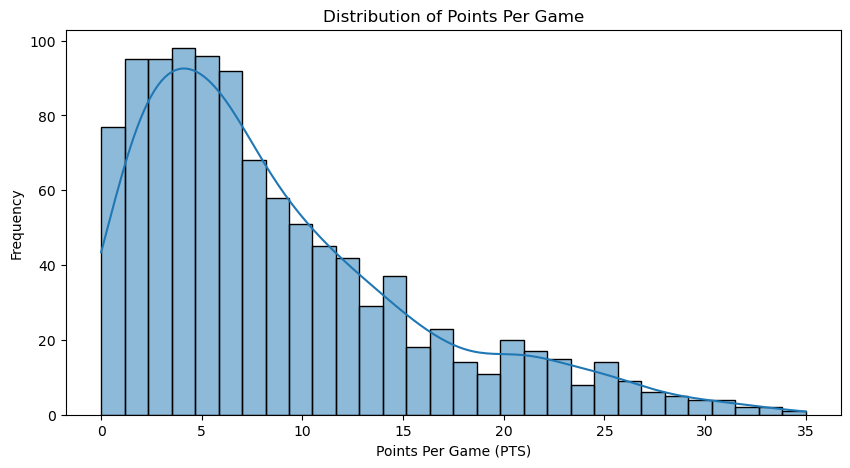

In [12]:
#distribution for PTS
plt.figure(figsize=(10, 5))
sns.histplot(nba_filtered['PTS'], bins=30, kde=True)
plt.title('Distribution of Points Per Game')
plt.xlabel('Points Per Game (PTS)')
plt.ylabel('Frequency')
plt.show()

#histogram shows a right-skewed distribution, indicating that the majority of players score
#relatively few points per game, with fewer players achieving higher points.

#the wide range extending to higher PTS values, highlights the presence
#of a few high-scoring players who significantly impact the game ("star players")

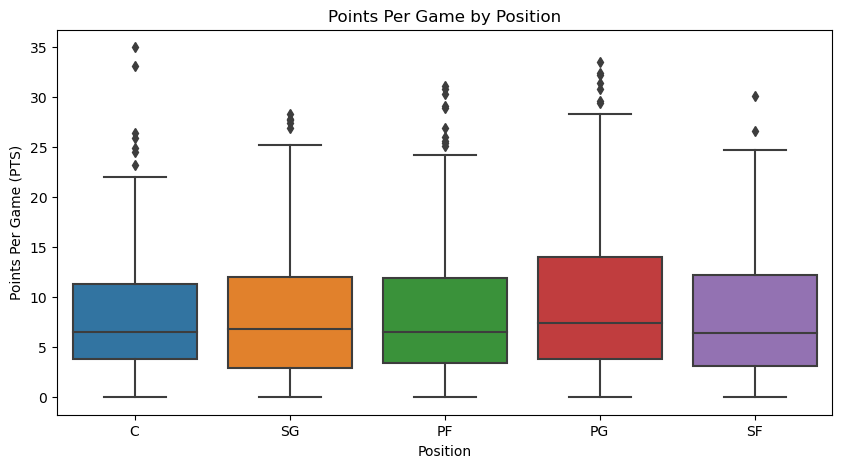

In [13]:
#boxplot for PTS by Pos
plt.figure(figsize=(10, 5))
sns.boxplot(data=nba_filtered, x='Pos', y='PTS')
plt.title('Points Per Game by Position')
plt.xlabel('Position')
plt.ylabel('Points Per Game (PTS)')
plt.show()

#SGs & PGs (shooting & point guards) typically have higher median points, reflecting their
#primary roles in scoring & offensive playmaking.

#SFs & PFs (small & power forwards) have similar median points with a wide spread,
#indicating their versatile roles in both scoring & other aspects of the game (ex. rebounding).

#Cs (centers) generally score fewer points compared to perimeter players, emphasizing their
#roles in defense & rebounding.. however, some also contribute significantly to scoring.

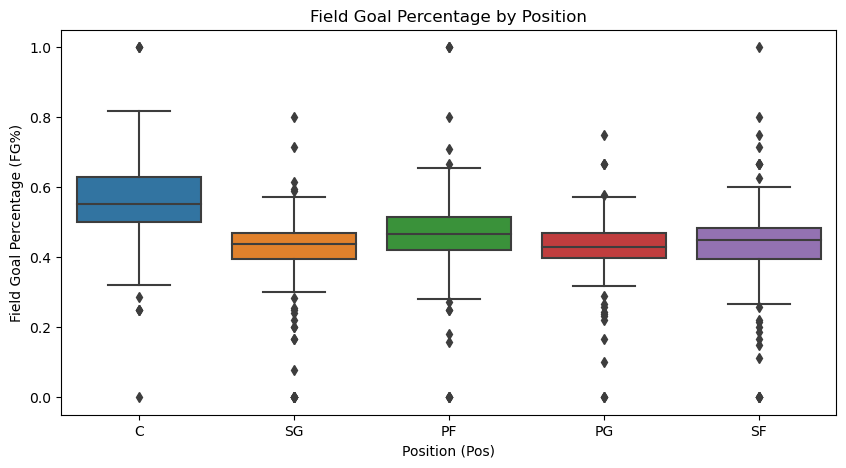

In [14]:
#boxplot for FG% by Pos
plt.figure(figsize=(10, 5))
sns.boxplot(data=nba_filtered, x='Pos', y='FG%')
plt.title('Field Goal Percentage by Position')
plt.xlabel('Position (Pos)')
plt.ylabel('Field Goal Percentage (FG%)')
plt.show()

#SGs & PGs have similar median FG% and wide IQRs that reflect their roles taking more
#perimeter shots, which generally have lower percentages.. while SFs have a higher median FG%
#reflecting their role in taking both perimeter & inside shots.

#PFs & Cs have higher median FG% and narrower IQRs showing their roles take higher percentage
#shots closer to the basket (shows that consistency is crucial for efficient offense).

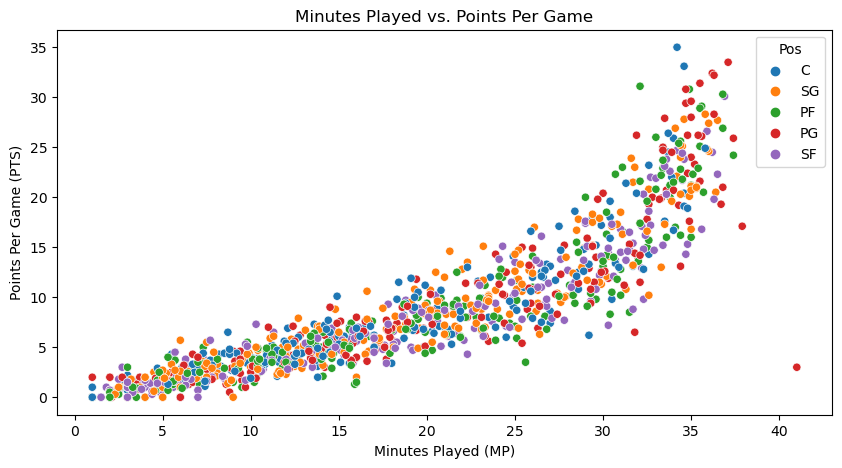

In [15]:
#scatterplot for MP vs. PTS by Pos
plt.figure(figsize=(10, 5))
sns.scatterplot(data=nba_filtered, x='MP', y='PTS', hue='Pos')
plt.title('Minutes Played vs. Points Per Game')
plt.xlabel('Minutes Played (MP)')
plt.ylabel('Points Per Game (PTS)')
plt.show()

#general trend is that there is a positive correlation between MP & PTS across all
#positions, which makes sense because the more time a player spends on the court, the more
#likely it is they score more points.

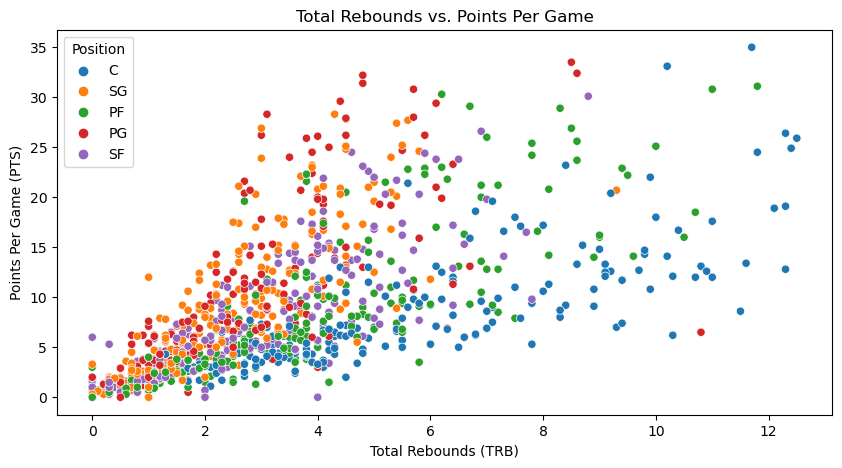

In [16]:
#scatterplot for TRB vs. PTS
plt.figure(figsize=(10, 5))
sns.scatterplot(data=nba_filtered, x='TRB', y='PTS', hue='Pos')
plt.title('Total Rebounds vs. Points Per Game')
plt.xlabel('Total Rebounds (TRB)')
plt.ylabel('Points Per Game (PTS)')
plt.legend(title='Position')
plt.show()

#there is a slight positive correlation between TRB & PTS, suggesting that players who are
#active in rebounding (specifically offensive) can also contribute to scoring, particularly
#for positions like power-forwards and centers.

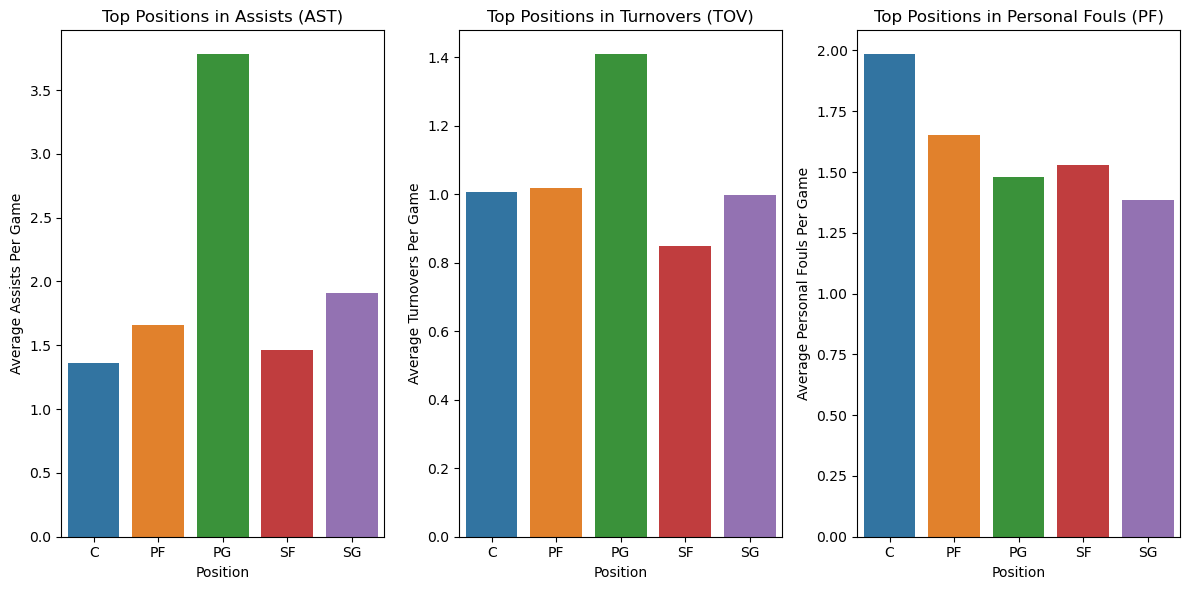

In [17]:
#look at top positions for key metrics (AST, TOV, PF)

#groupby Pos and calculate averages
top_performers = nba_filtered.groupby('Pos').agg({
    'AST': 'mean',
    'TOV': 'mean',
    'PF': 'mean'
}).reset_index()

#plot
plt.figure(figsize=(12, 6))

#assists (AST)
plt.subplot(1, 3, 1)
sns.barplot(data=top_performers, x='Pos', y='AST')
plt.title('Top Positions in Assists (AST)')
plt.xlabel('Position')
plt.ylabel('Average Assists Per Game')

#turnovers (TOV)
plt.subplot(1, 3, 2)
sns.barplot(data=top_performers, x='Pos', y='TOV')
plt.title('Top Positions in Turnovers (TOV)')
plt.xlabel('Position')
plt.ylabel('Average Turnovers Per Game')

#personal fouls (PF)
plt.subplot(1, 3, 3)
sns.barplot(data=top_performers, x='Pos', y='PF')
plt.title('Top Positions in Personal Fouls (PF)')
plt.xlabel('Position')
plt.ylabel('Average Personal Fouls Per Game')

plt.tight_layout()
plt.show()

#the data we're seeing makes sense when you consider position. for example, point-guards
#lead in assists & turnovers due to their primary playmaking role, while centers and
#power-forwards have higher personal fould due to their physical presence & defensive roles.

#### Correlations

/var/folders/vt/4d70g20j64b8p6q8ps90f_640000gn/T/ipykernel_42683/4236624747.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix= nba_filtered.corr()


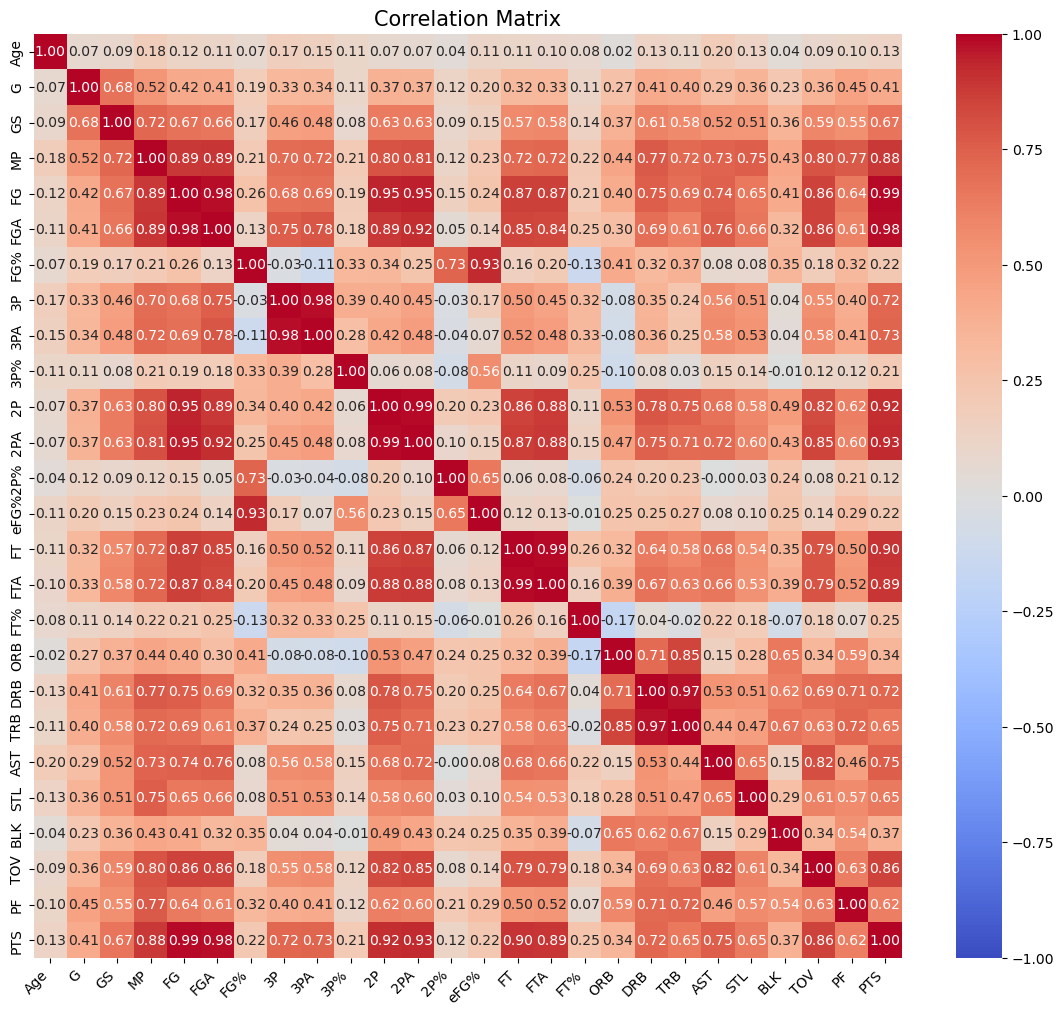

In [20]:
#correlation matrix
corr_matrix= nba_filtered.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix', fontsize=15)
plt.show()

#strong positive correlations:
    #FG/FGA & PTS; players who attempt and/or score more field goals also tend to score more points
    #MP & PTS; players who spend more time on the court tend to score more points
    #FT & PTS; free throws seem to be a significant contributor to a player's scoring
    
#moderate positive correlations:
    #AST/TRB & PTS; players who assist and rebound more, tend to score more points
    #AST & MP: players with more playing time tend to have more opportunites to assist

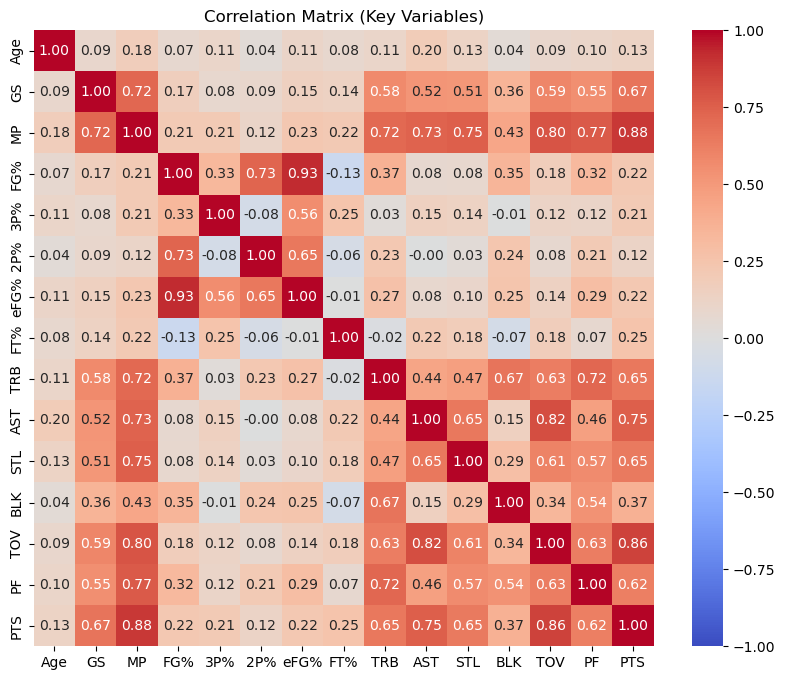

In [21]:
#decided to use a subset of relevant variables, so we don't capture all of the noise
relevant_variables= ['Age', 'GS', 'MP', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

#new correlation matrix
relevant_corr_matrix= nba_filtered[relevant_variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(relevant_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Key Variables)')
plt.show()

#some of the same correlations popped up like MP & PTS, AST & PTS, and TRB & PTS

#some new ones popped up:
    #TOV & PTS; players who handle the ball more frequently (thus having more scoring
        #opportunities), also have more chances to commit turnovers
    #BLK & TRB; suggests that players who are good at blocking shots are also effective
        #rebounders (this would be true of positions like centers)    

/var/folders/vt/4d70g20j64b8p6q8ps90f_640000gn/T/ipykernel_42683/2128396820.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z= linkage(distance_matrix, 'ward')


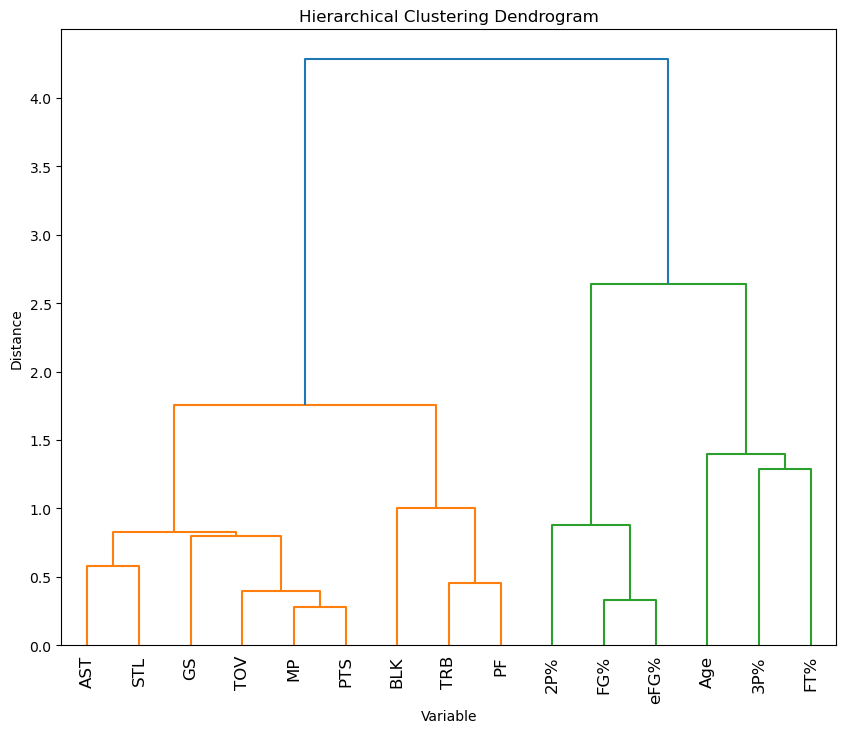

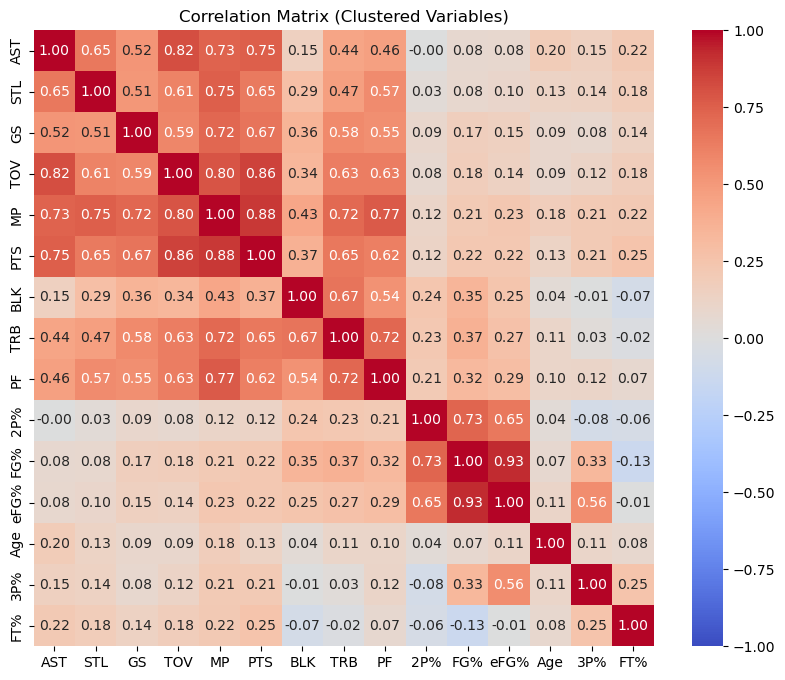

In [22]:
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list
#perform hierarchical clustering
    #helps give a clear view of how variables cluster together based on their correlations
    #helps identify groups of variables that are more closely related to each other

#convert correlation matrix to distance matrix (better metric for clustering)
distance_matrix= 1 - relevant_corr_matrix

#compute linkage matrix
    #organizes the distance matric & minimizes the variance of clusters being merged
Z= linkage(distance_matrix, 'ward')

#create dendrogram (helps visualize the clustering result)
plt.figure(figsize=(10, 8))
dendrogram(Z, labels=relevant_variables, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Variable')
plt.ylabel('Distance')
plt.show()

#use clustering result to reorder correlation matrix
    #get order of variables
ordered_variables= [relevant_variables[i] for i in leaves_list(Z)]
    #reorder the correlation matrix
ordered_corr_matrix= relevant_corr_matrix.loc[ordered_variables, ordered_variables]

#plot the ordered correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(ordered_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Clustered Variables)')
plt.show()

#clusters on metrics related to shooting efficiency (FG%, 3P%, 2P%, eFG%)
#clusters on metrics related to playing time & performance (MP, GS, PTS)

#both reflect the interconnected nature of variables contributing to overall player performance

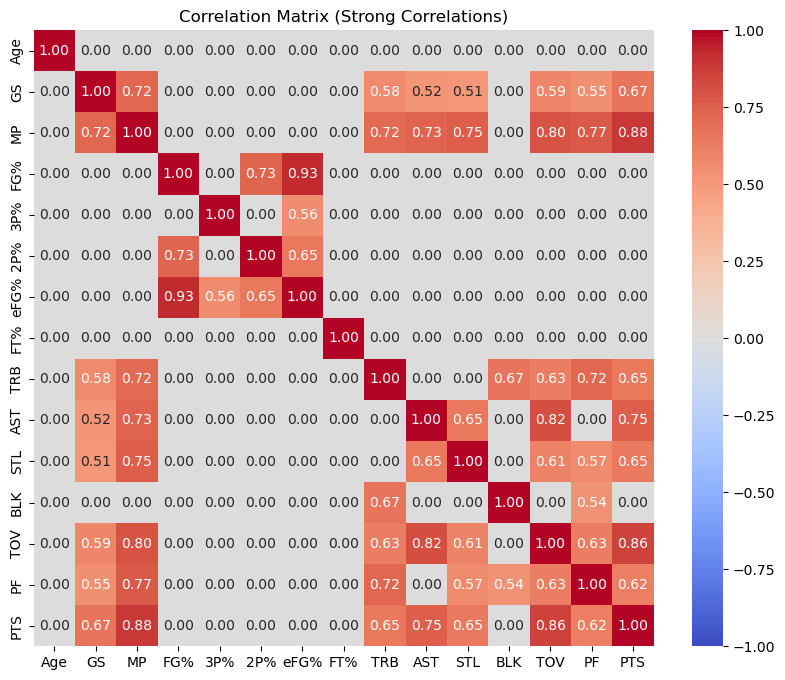

In [24]:
#filter based on strong correlations (absolute value > 0.5) between relevant variables
strong_corr_matrix= relevant_corr_matrix[corr_matrix.abs() > 0.5].fillna(0)

#plot
plt.figure(figsize=(10, 8))
sns.heatmap(strong_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Strong Correlations)')
plt.show()

#MP (minutes played) is strongly correlated w/ various performance metrics such as PTS (0.88),
#TOV (0.80), AST (0.73), & PF (0.77); seems that players w/ more playing time tend to 
#have higher values in these areas

#regarding shooting efficiency, there are strong correlations between FG% and 2P% (0.73),
#eFG% (0.93); this suggests that players who are effective shooters in one area tend
#to perform well in others